# Table of Contents:
* Introduction
* Preprocessing the data
    * Import Libraries
    * Getting Data
    * Exploring Data
    * Missing Values
    * Visualizing Data
        * Univariate Analaysis
        * Bivariate Analysis
        * Multivariate Analaysis 
* Feature Engieering
    * Feature Scaling
    * Create New Features / Feature Creating
    * Feature Selecting
    











* The RMS Titanic
* Import Libraries
* Getting the Data
* Data Exploration/Analysis
* Data Preprocessing
*     Missing Data
Converting Features
Creating Categories
Creating new Features
Building Machine Learning Models
Training 8 different models
Which is the best model ?
K-Fold Cross Validation
Random Forest
What is Random Forest ?
Feature importance
Hyperparameter Tuning
Further Evaluation
Confusion Matrix
Precision and Recall
F-Score
Precision Recall Curve
ROC AUC Curve
ROC AUC Score
Submission
Summary


# Introduction

In this project, I will work with the Titanic data set, which is popular among those who are just beginning to learn data science. Based on the passenger information that like sex, age, economic status, etc. provided in the data set, I will predict the passengers whether survived or not.

# Preprocessing the Data

### Import Libraries

In [77]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import missingno as msno


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# Model Selection
from sklearn.model_selection import cross_val_score

### Getting Data

In [78]:
train = pd.read_csv(r'..\data\train.csv')
test = pd.read_csv(r'..\data\test.csv')

### Exploring Data

In [79]:
print('train shape is :',train.shape)
print('test shape is :',test.shape)

train shape is : (891, 12)
test shape is : (418, 11)


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The train set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. 

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The test set has 418 examples and 11 features 2 of the features are floats , 4 are integers and 5 are objects 

In [82]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According the table, we can say that 38% of the training set survived the Titanic.We can also see that we need to scale features.

In [83]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [84]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the table above, we can see that there are some properties that need to be converted to numerical values ​​and that there are missing data to be dealt with.

In [85]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Missing Values


In [86]:
def explore_missing_values(df) :
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index,y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of Missing Values')
    plt.title('PERCENT MISSING DATA BY FEATURE')
    plt.show()
    print(missing_data.head(20))
    

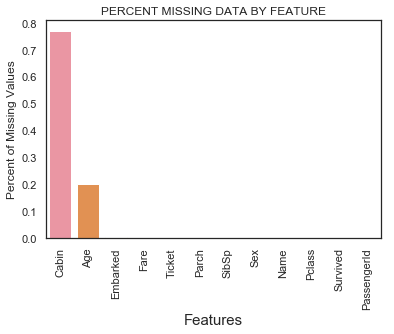

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000


In [87]:
explore_missing_values(train)

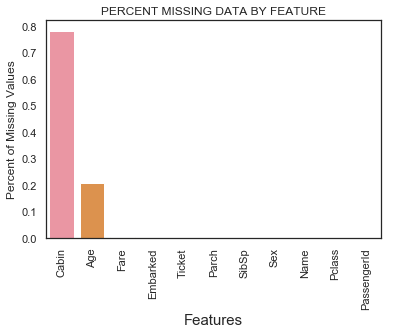

             Total   Percent
Cabin          327  0.782297
Age             86  0.205742
Fare             1  0.002392
Embarked         0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
PassengerId      0  0.000000


In [88]:
explore_missing_values(test)

Fare --> I'll fill the single missing value in the 'Fare' column with the mean. 

Embarked --> I'll fill the 2 missing values in the 'Embarked' column with a common value.

Age --> I will fill the missing values in the 'Age' column with -0.5, and then try to make it more useful in feature engineering section.

Cabin --> Although the 'Cabin' feature has too much missing value, for now, I won't drop the column and I will not intervene in the missing values, then I will try to extract useful information from the 'Cabin' column.

In [89]:
def process_missing(df):
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    df["Age"] = df["Age"].fillna(-0.5)    


In [90]:
process_missing(train)
process_missing(test)

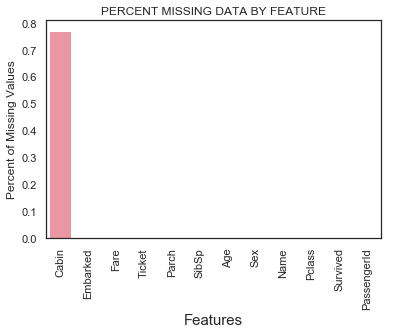

             Total   Percent
Cabin          687  0.771044
Embarked         0  0.000000
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Age              0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000


In [91]:
explore_missing_values(train)

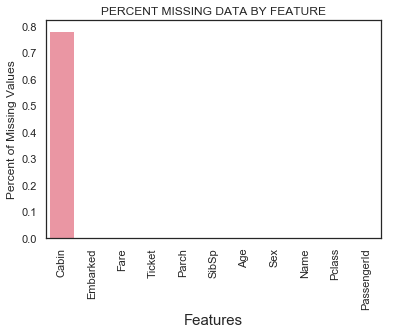

             Total   Percent
Cabin          327  0.782297
Embarked         0  0.000000
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Age              0  0.000000
Sex              0  0.000000
Name             0  0.000000
Pclass           0  0.000000
PassengerId      0  0.000000


In [92]:
explore_missing_values(test)

Now only the cabin column has missing values.

###  Visualizing the Data

#### Univariate Analysis

In [93]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

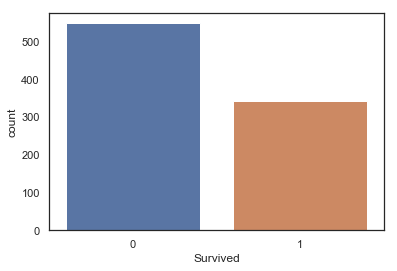

In [94]:
sns.countplot(x='Survived',data=train)

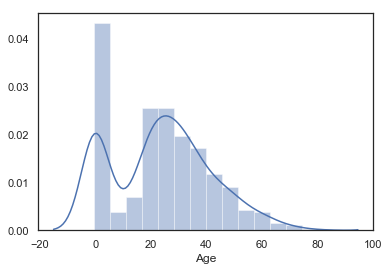

In [95]:
sns.distplot(train['Age'])

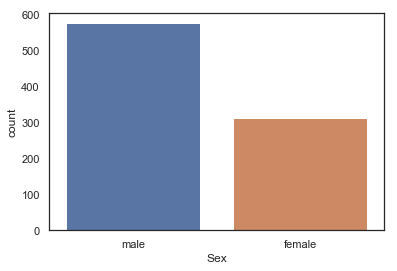

In [96]:
sns.countplot(x='Sex',data=train)

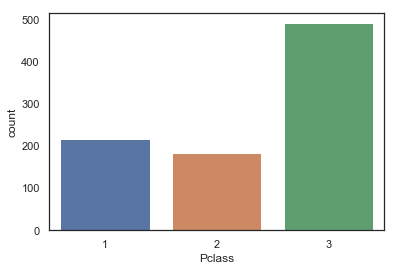

In [97]:
sns.countplot(x='Pclass', data = train)

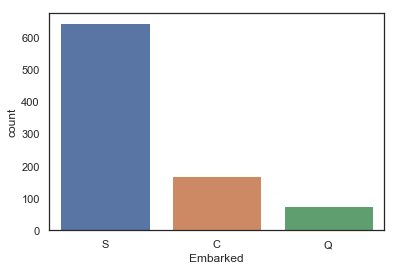

In [98]:
sns.countplot(x='Embarked', data = train)

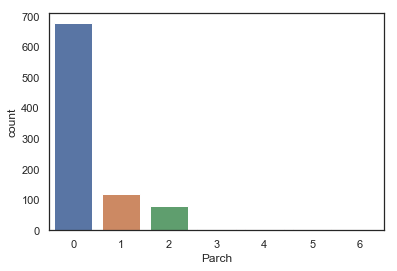

In [99]:
sns.countplot(x='Parch', data = train)

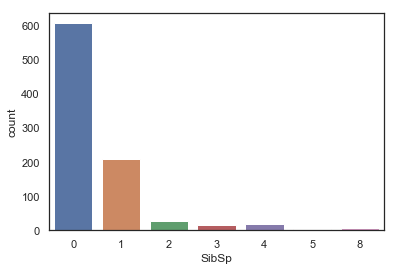

In [100]:
sns.countplot(x='SibSp', data = train)

#### Bivariate Analysis

In [101]:
def bar_plots(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))    

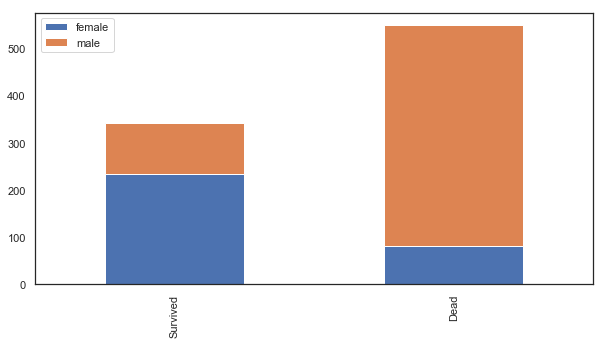

In [102]:
bar_plots('Sex')

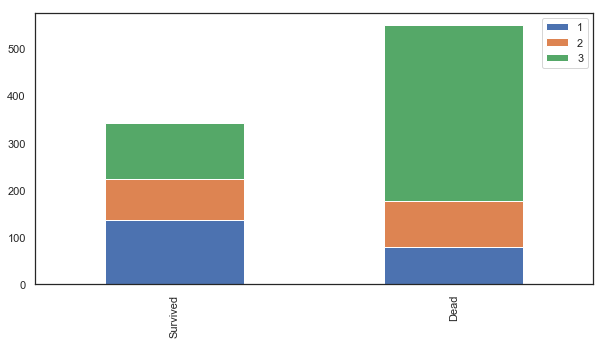

In [103]:
bar_plots('Pclass')

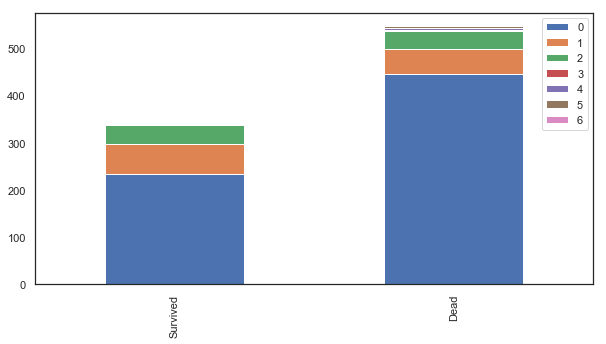

In [104]:
bar_plots('Parch')

#### Multivariate Analysis

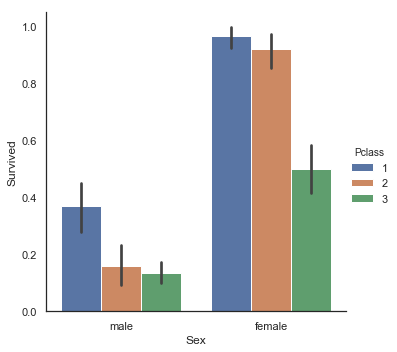

In [105]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train);

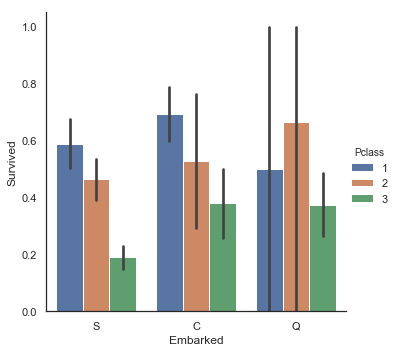

In [106]:
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", data=train);

In [107]:
# sns.catplot(x='Age_categories',palette="ch:.25",y='Survived' , kind="bar", data=train);

In [108]:
# sns.catplot(x='Fare_categories',palette="ch:.6",y='Survived' , kind="bar", data=train);

In [109]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

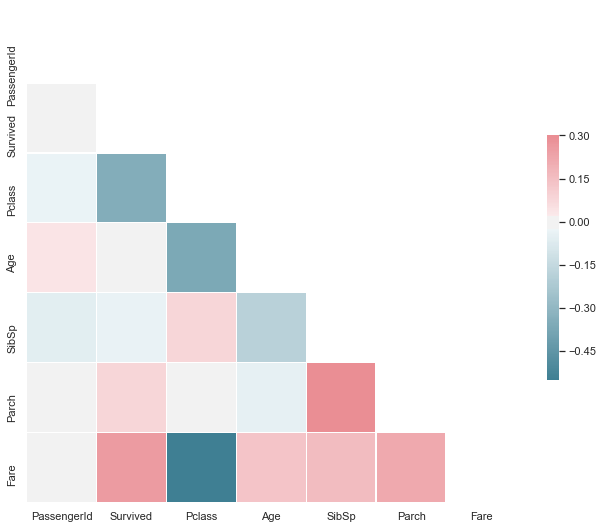

In [110]:
plot_correlation_heatmap(train)

## Feature Engineering

#### Create Categories

In [111]:
def process_Age(df):    
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_Fare(df):
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

#### Create New Features

In [112]:
def process_Cabin(df):
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df.drop('Cabin',axis=1, inplace=True)
    return df

def process_Name(df):
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    df.drop("Name",axis=1,inplace=True)
    
def process_SibSp_Parch(df):
    df["familysize"] = df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"] = 0
    df.loc[(df["familysize"] == 0),"isalone"] = 1
    df = df.drop("familysize",axis=1)
    return df

In [113]:
def process_df(df):
    process_Age(df)
    process_Fare(df)
    process_Cabin(df)
    process_Name(df)
    process_SibSp_Parch(df)

In [114]:
process_df(train)
process_df(test)

#### Convert Features 

In [115]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Fare_categories,Cabin_type,Title,familysize,isalone
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,0-12,Unknown,Mr,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Adult,50-100,C,Mrs,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,0-12,Unknown,Miss,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Young Adult,50-100,C,Mrs,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Young Adult,0-12,Unknown,Mr,0,1
5,6,0,3,male,-0.5,0,0,330877,8.4583,Q,Missing,0-12,Unknown,Mr,0,1
6,7,0,1,male,54.0,0,0,17463,51.8625,S,Adult,50-100,E,Mr,0,1
7,8,0,3,male,2.0,3,1,349909,21.0750,S,Infant,12-50,Unknown,Master,4,0
8,9,1,3,female,27.0,0,2,347742,11.1333,S,Young Adult,0-12,Unknown,Mrs,2,0
9,10,1,2,female,14.0,1,0,237736,30.0708,C,Teenager,12-50,Unknown,Mrs,1,0


In [116]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([column_name], axis=1)
    return df

In [117]:
dummies_columns = ['Pclass', 'Sex','Embarked','Age_categories', 'Fare_categories',
       'Cabin_type', 'Title', 'familysize', 'isalone']

In [118]:
for col in dummies_columns:
    train = create_dummies(train,col)
    test = create_dummies(test,col)

#### Feature Scaling

In [119]:
train.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,...,familysize_1,familysize_2,familysize_3,familysize_4,familysize_5,familysize_6,familysize_7,familysize_10,isalone_0,isalone_1
0,1,0,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,2,1,38.0,1,0,PC 17599,71.2833,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,113803,53.1000,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,0,35.0,0,0,373450,8.0500,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,6,0,-0.5,0,0,330877,8.4583,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,7,0,54.0,0,0,17463,51.8625,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,2.0,3,1,349909,21.0750,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8,9,1,27.0,0,2,347742,11.1333,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9,10,1,14.0,1,0,237736,30.0708,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [120]:
from sklearn.preprocessing import minmax_scale
columns = ["Age","Fare"]

In [121]:
for col in columns:
    train[col + "_scaled"] = minmax_scale(train[col])
    test[col + "_scaled"] = minmax_scale(test[col])

## Feature Selecting

In [122]:
from sklearn.feature_selection import RFECV

def select_features(df):
    # Remove non-numeric columns, columns that have null values
    df = df.select_dtypes([np.number]).dropna(axis=1)
    X_train = df.drop(["Survived","PassengerId"],axis=1)
    y_train = df["Survived"]
    
    clf = RandomForestClassifier(random_state=1,n_estimators=9)
    selector = RFECV(clf,cv=10)
    selector.fit(X_train, y_train)
    
    best_columns = list(X_train.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns


In [123]:
cols = select_features(train)

Best Columns 
------------
['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_3', 'Sex_female', 'Sex_male', 'Cabin_type_Unknown', 'Title_Mr', 'Age_scaled', 'Fare_scaled']



## Model Selecting And Model Tuning

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    X_train = df[features]
    y_train = df["Survived"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },  
        {
            "name": "SVC",
            "estimator": SVC(),
            "hyperparameters":
                {   'C': [0.1, 1, 10, 100, 1000],  
                    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                    'kernel': ['rbf']
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(X_train, y_train)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

In [128]:
result = select_model(train,cols)

LogisticRegression
------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Best Score: 0.8103254769921436
Best Parameters: {'solver': 'lbfgs'}

KNeighborsClassifier
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.7699214365881033
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.8451178451178452
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}

SVC
---
Best Score: 0.8181818181818182
Best Parameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Making a Submission

In [75]:
def save_submission_file(model,cols,filename="submission.csv"):
    holdout_data = test[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = test["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
    submission = pd.DataFrame(submission_df)

    submission.to_csv(filename,index=False)

In [76]:
best_rf_model = result[0]["best_model"]
save_submission_file(best_rf_model,cols)